In [ ]:
!pip install emojihunt --upgrade --q
print("Current project version:")
!pip freeze | grep emojihunt
from emojihunt import *
import json

Current project version:
emojihunt==1.1.1


# Template For EmojiHunt Project!

## EmojiHunt()
This is your emojihunt environment class you will use it for generating problem images, testing your configuration and getting your final scores on the trials.
### EmojiHunt.get_config()
This returns the dictionary of the configuration for the EmojiHunt. You can change the booleans in this dictionary to make the problem harder or easier.
### EmojiHunt.update_config(dict)
This writes the passed dictionary as the new configuration for the EmojiHunt. It should be formated as recived from .get_config(). 
### EmojiHunt.generate_image_and_points()
This returns 3 objects the target image, the example emoji and the ground truth real points. This function is avalible so you can test your method without needing to perform full official tests. The emoji image and the test target image are simple cv2 formated color images (BGR, numpy uint8). The ground truth points are a list of tuples of points [(x_0,y_0)..(x_n,y_n)]
### EmojiHunt.generate_image_and_points(ground_truth, predicted)
This function gives the score between two sets of emoji points, the ground truth given by .generate_image_and_points() and the prediction points. 
### EmojiHunt.offical_test(function, config)
For this function you explicitly give a callable object (either fucntion or class method) that takes in the positional arguments of image, sample_emoji. This function then runs multiple tests on this function and prints a report based on the config and the socres. Official tests are seeded so the test for each config is always the same. 
### Examples of the usage of all these methods are given below.


In [ ]:
emoji_hunt_object = EmojiHunt() 
print(json.dumps(emoji_hunt_object.get_config(), indent=2))
def test_bad_function(image, emoji):
    return [(random.randint(0,512),random.randint(0,512))]
emoji_hunt_object.offical_test(test_bad_function,emoji_hunt_object.get_config())

169001437/169001437 [==============================] - 2s 0us/step
{
  "emoji_transforms": {
    "Add": true,
    "Multiply": true,
    "Cutout": true,
    "CoarseDropout": true,
    "CoarseSaltAndPepper": true,
    "JpegCompression": true,
    "BlendAlpha": true,
    "BlendAlphaRegularGrid": true,
    "GaussianBlur": true,
    "MotionBlur": true,
    "MultiplyHueAndSaturation": true,
    "Grayscale": true,
    "ChangeColorTemperature": true,
    "SigmoidContrast": true,
    "CLAHE": true,
    "Emboss": true,
    "DirectedEdgeDetect": true,
    "Fliplr": true,
    "PiecewiseAffine": true,
    "PerspectiveTransform": true,
    "WithPolarWarping": true,
    "Rot90": true,
    "ElasticTransformation": true,
    "Jigsaw": true
  }
}
~~~~~STARTING TEST~~~~~~
Enabled Augmentations....
     Add
     Multiply
     Cutout
     CoarseDropout
     CoarseSaltAndPepper
     JpegCompression
     BlendAlpha
     BlendAlphaRegularGrid
     GaussianBlur
     MotionBlur
     MultiplyHueAndSaturation
   

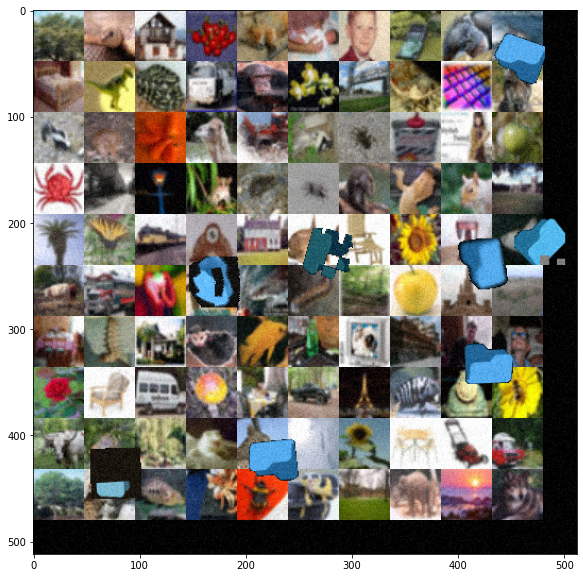

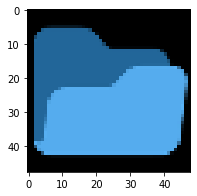

In [ ]:
import matplotlib.pyplot as plt
import cv2
test_image, emoji_target, gt_points = emoji_hunt_object.generate_image_and_points()

plt.figure(figsize = (10,10))
imgplot = plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize = (3,3))
imgplot2 = plt.imshow(cv2.cvtColor(emoji_target, cv2.COLOR_BGR2RGB))
plt.show()